### Regressão Linear com o dataset Boston<br><br>

In [1]:
import pandas as pd
Boston = pd.read_csv('Boston.csv')

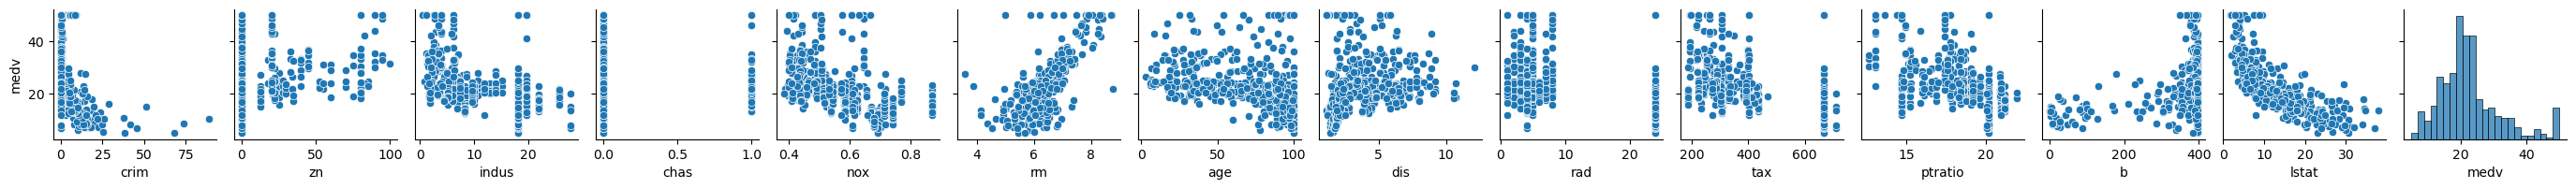

In [2]:
import seaborn as sns
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

sns.pairplot(Boston, y_vars="medv", x_vars=Boston.columns.values, height=2);

In [3]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

Parece que há uma **relação positiva linear** entre **medv** (valor médio da casa) e **rm** (número de cômodos)

In [4]:
Xrm = Boston.rm
y = Boston.medv

In [5]:
print(type(Xrm), type(y))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [7]:
print(Xrm.shape, y.shape)

(506,) (506,)


In [9]:
Boston_rm = pd.DataFrame({'medv':y,'rm':Xrm})
Boston_rm.head()

,medv,rm
0,24.0,6.575
1,21.6,6.421
2,34.7,7.185
3,33.4,6.998
4,36.2,7.147


<center><u><h1 style="font-size: 30px;">scikit-learn</h1></u></center><br>

<center><u><h1 style="font-size: 16px;">https://scikit-learn.org/</h1></u></center><br>

<center>https://scikit-learn.org/stable/tutorial/statistical_inference/settings.html</center>

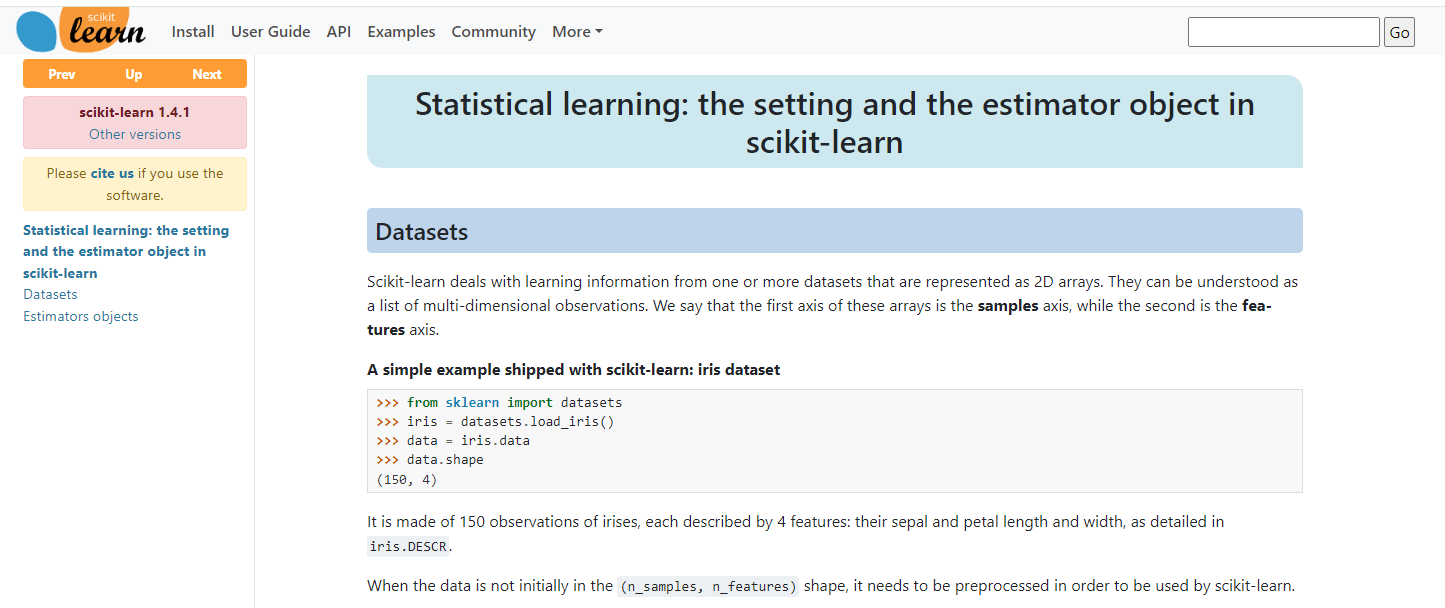

Scikit-learn trata do aprendizado de informações a partir um ou mais conjuntos de dados representados como matrizes 2D. Eles podem ser entendidos como uma lista de observações multidimensionais. Dizemos que o primeiro eixo dessas matrizes é o eixo das amostras, enquanto o segundo é o eixo das características.<br><br>
Quando os dados não estão inicialmente no formato (n_samples, n_features), eles precisam ser pré-processados para serem usados pelo scikit-learn.

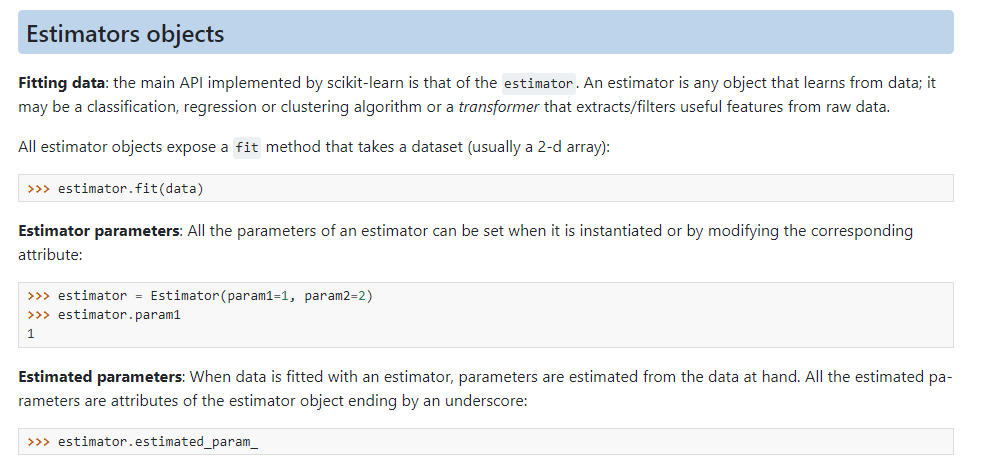

Ajustando dados: a principal API implementada pelo scikit-learn é a do estimador. Um estimador é qualquer objeto que aprende com os dados; pode ser um algoritmo de classificação, regressão ou agrupamento ou um transformer que extrai/filtra recursos úteis de dados brutos.

Todos os objetos estimadores têm um método de ajuste que utiliza um conjunto de dados (geralmente uma matriz 2-d):

>estimador.fit(dados)

Parâmetros do estimador: Todos os parâmetros de um estimador podem ser definidos quando ele é instanciado ou modificando o atributo correspondente:

>estimador = Estimador(param1=1, param2=2)
>estimador.param1
1

Parâmetros estimados: Quando os dados são ajustados com um estimador, os parâmetros são estimados a partir dos dados disponíveis. Todos os parâmetros estimados são atributos do objeto estimador terminando com um sublinhado:

> estimador.estimated_param_

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
estimator = LinearRegression()

In [13]:
estimator.fit(Xrm, y)
# erro:
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array

ValueError: Expected 2D array, got 1D array instead:
array=[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.854 6.101 7.929 5.877
 6.319 6.402 5.875 5.88  5.572 6.416 5.859 6.546 6.02  6.315 6.86  6.98
 7.765 6.144 7.155 6.563 5.604 6.153 7.831 6.782 6.556 7.185 6.951 6.739
 7.178 6.8   6.604 7.875 7.287 7.107 7.274 6.975 7.135 6.162 7.61  7.853
 8.034 5.891 6.326 5.783 6.064 5.344 5.96  5.404 5.807 6.375 5.412 6.182
 5.888 6.642 5.951 6.373 6.951 6.164 6.879 6.618 8.266 8.725 8.04  7.163
 7.686 6.552 5.981 7.412 8.337 8.247 6.726 6.086 6.631 7.358 6.481 6.606
 6.897 6.095 6.358 6.393 5.593 5.605 6.108 6.226 6.433 6.718 6.487 6.438
 6.957 8.259 6.108 5.876 7.454 8.704 7.333 6.842 7.203 7.52  8.398 7.327
 7.206 5.56  7.014 8.297 7.47  5.92  5.856 6.24  6.538 7.691 6.758 6.854
 7.267 6.826 6.482 6.812 7.82  6.968 7.645 7.923 7.088 6.453 6.23  6.209
 6.315 6.565 6.861 7.148 6.63  6.127 6.009 6.678 6.549 5.79  6.345 7.041
 6.871 6.59  6.495 6.982 7.236 6.616 7.42  6.849 6.635 5.972 4.973 6.122
 6.023 6.266 6.567 5.705 5.914 5.782 6.382 6.113 6.426 6.376 6.041 5.708
 6.415 6.431 6.312 6.083 5.868 6.333 6.144 5.706 6.031 6.316 6.31  6.037
 5.869 5.895 6.059 5.985 5.968 7.241 6.54  6.696 6.874 6.014 5.898 6.516
 6.635 6.939 6.49  6.579 5.884 6.728 5.663 5.936 6.212 6.395 6.127 6.112
 6.398 6.251 5.362 5.803 8.78  3.561 4.963 3.863 4.97  6.683 7.016 6.216
 5.875 4.906 4.138 7.313 6.649 6.794 6.38  6.223 6.968 6.545 5.536 5.52
 4.368 5.277 4.652 5.    4.88  5.39  5.713 6.051 5.036 6.193 5.887 6.471
 6.405 5.747 5.453 5.852 5.987 6.343 6.404 5.349 5.531 5.683 4.138 5.608
 5.617 6.852 5.757 6.657 4.628 5.155 4.519 6.434 6.782 5.304 5.957 6.824
 6.411 6.006 5.648 6.103 5.565 5.896 5.837 6.202 6.193 6.38  6.348 6.833
 6.425 6.436 6.208 6.629 6.461 6.152 5.935 5.627 5.818 6.406 6.219 6.485
 5.854 6.459 6.341 6.251 6.185 6.417 6.749 6.655 6.297 7.393 6.728 6.525
 5.976 5.936 6.301 6.081 6.701 6.376 6.317 6.513 6.209 5.759 5.952 6.003
 5.926 5.713 6.167 6.229 6.437 6.98  5.427 6.162 6.484 5.304 6.185 6.229
 6.242 6.75  7.061 5.762 5.871 6.312 6.114 5.905 5.454 5.414 5.093 5.983
 5.983 5.707 5.926 5.67  5.39  5.794 6.019 5.569 6.027 6.593 6.12  6.976
 6.794 6.03 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
#Xrm = Xrm.reshape(-1,1)
#y = y.reshape(-1,1)
# AttributeError: 'Series' object has no attribute 'reshape'

AttributeError: 'Series' object has no attribute 'reshape'

In [18]:
Xrm = Xrm.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [19]:
Xrm.shape, y.shape

((506, 1), (506, 1))

In [20]:
estimator.fit(Xrm, y)

LinearRegression()

In [21]:
b = estimator.intercept_
b

array([-34.67062078])

In [22]:
a = estimator.coef_
a

array([[9.10210898]])

In [26]:
y_pred = estimator.predict(Xrm)
y_pred[:5]

array([[25.17574577],
       [23.77402099],
       [30.72803225],
       [29.02593787],
       [30.38215211]])

In [27]:
Boston_rm[:5]

,medv,rm
0,24.0,6.575
1,21.6,6.421
2,34.7,7.185
3,33.4,6.998
4,36.2,7.147


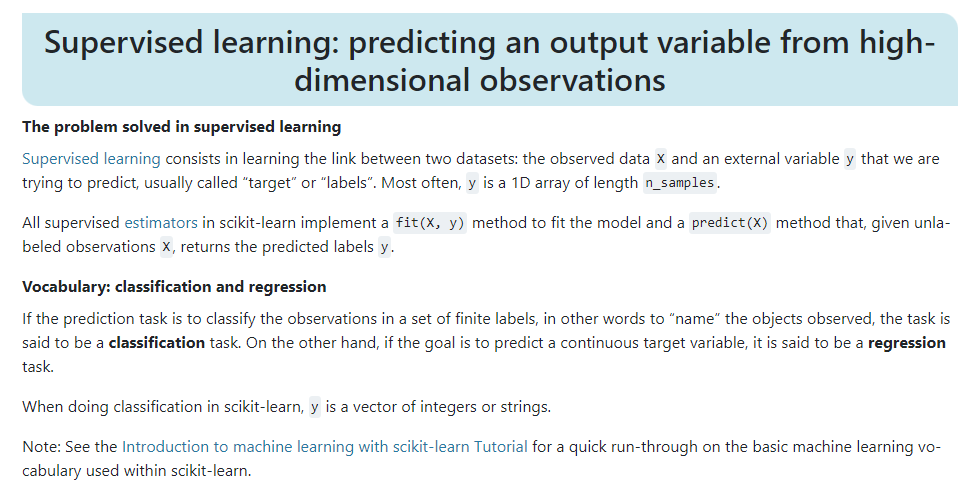

In [31]:
import numpy as np

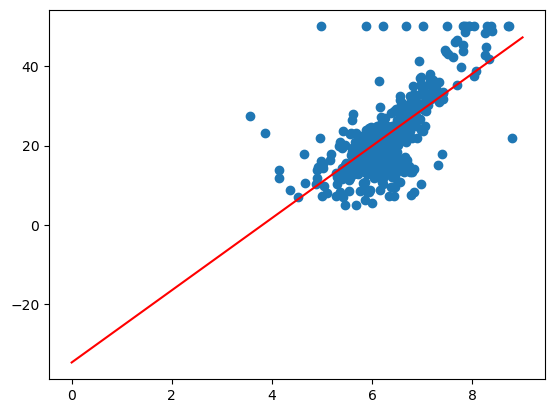

In [32]:
x = np.linspace(0,9).reshape(-1,1)

yp = a*x + b
plt.plot(x, yp, color = 'r')

plt.scatter(Xrm,y)

In [30]:
estimator.score(Xrm,y)

0.48352545599133423